In [31]:
import numpy as np

3

In [38]:
import numpy as np

def cross_correlation_2d(img, kernel):
    '''Given a kernel of arbitrary m x n dimensions, with both m and n being
    odd, compute the cross correlation of the given image with the given
    kernel, such that the output is of the same dimensions as the image and that
    you assume the pixels out of the bounds of the image to be zero. Note that
    you need to apply the kernel to each channel separately, if the given image
    is an RGB image.

    Inputs:
        img:    Either an RGB image (height x width x 3) or a grayscale image
                (height x width) as a numpy array.
        kernel: A 2D numpy array (m x n), with m and n both odd (but may not be
                equal).

    Output:
        Return an image of the same dimensions as the input image (same width,
        height and the number of color channels)
    '''
    
    if img.ndim == 2:
        h, w = img.shape
        c = 1
        padded_height = h + kernel.shape[0]
        padded_width = w + kernel.shape[1]
        img_padded = zero_pad(img, padded_height, padded_width)
    else:
        h, w, c = img.shape
        padded_height = h + kernel.shape[0]
        padded_width = w + kernel.shape[1]
        img_padded = zero_pad(img, padded_height, padded_width)
    new_img = np.zeros((h, w, c))
    for i in range(h):
        for j in range(w):
            for k in range(c):
                new_img[i, j, k] = np.sum(img_padded[i:i + kernel.shape[0], j:j + kernel.shape[1], k] * kernel)
    return new_img
    

    # TODO-BLOCK-BEGIN
    raise Exception("TODO in hybrid.py not implemented")
    # TODO-BLOCK-END
def zero_pad(img, pad_height, pad_width):
    if img.ndim == 2:
        h, w = img.shape
    else:
        h, w, _ = img.shape
    pad_height = pad_height - h
    pad_width = pad_width - w
    pad_top = pad_height // 2
    pad_bottom = pad_height - pad_top
    pad_left = pad_width // 2
    pad_right = pad_width - pad_left

    if img.ndim == 2:
        top = np.zeros((pad_top, w))
        bottom = np.zeros((pad_bottom, w))
        left = np.zeros((h + pad_height, pad_left))
        right = np.zeros((h + pad_height, pad_right))
        padded = np.vstack((top, img, bottom))
        padded = np.hstack((left, padded, right))

    else:
        top = np.zeros((pad_top, w, 3))
        bottom = np.zeros((pad_bottom, w, 3))
        left = np.zeros((h + pad_height, pad_left, 3))
        right = np.zeros((h + pad_height, pad_right, 3))
        padded = np.vstack((top, img, bottom))
        padded = np.hstack((left, padded, right))
    return padded


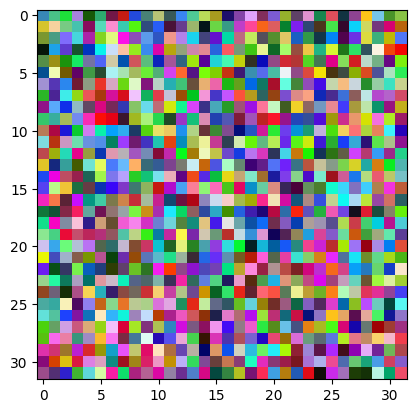

In [43]:
img = np.random.rand(32, 32, 3)
kernel = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]])
cross_correlation_2d(img, kernel).shape
import matplotlib.pyplot as plt
plt.imshow(img)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.22840600846464476..4.498779316134033].


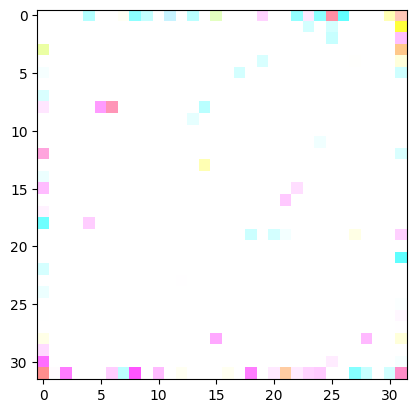

In [44]:
plt.imshow(cross_correlation_2d(img, kernel))